In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns
from matplotlib.ticker import FuncFormatter



In [2]:
pd.options.display.float_format = '{:.4f}'.format

In [3]:
train = pd.read_csv("../data/train_subset.csv")

Expanding your `plotter` library to handle a variety of complex data types and visualization needs can greatly enhance its utility and flexibility. Here are several advanced features and capabilities you might consider implementing:

### 1. **Time Series Support**
   - **Time-based Grouping**: Enable grouping data by time intervals (e.g., minutes, hours, days, weeks).
   - **Resampling and Rolling Windows**: Support for resampling time series data to a lower or higher frequency and applying rolling window calculations.
   - **Time Series Decomposition**: Add functionality to decompose time series into trend, seasonal, and residual components.

### 2. **Advanced Data Transformations**
   - **Pivot Tables**: Support for creating pivot tables to reshape the data format, which can be very useful for creating specific types of plots.
   - **Data Normalization and Scaling**: Provide options for scaling and normalizing data, which is crucial for some types of analysis and machine learning feature engineering.
   - **Conditional Transformations**: Apply transformations based on conditions; for example, applying different aggregations or filters based on group characteristics.

### 3. **Interactive Visualizations**
   - **Integration with Libraries like Plotly and Bokeh**: These libraries allow for interactive plots that users can explore dynamically.
   - **Dashboarding Capabilities**: Offer integration with dashboard frameworks like Dash or Panel to create web-based interactive visualizations.

### 4. **Statistical Analysis Tools**
   - **Regression and Trend Lines**: Automatically fit and plot regression or other analytical trend lines on scatter plots.
   - **Error Bars**: Implement functionality to add error bars to show the variability of the data.
   - **Histogram Binning Control**: Provide advanced controls for the number of bins, bin width, and limits when plotting histograms.

### 5. **Geospatial Data Handling**
   - **Mapping**: Add support for plotting geospatial data on maps using libraries like Geopandas and Matplotlib Basemap or Plotly.
   - **Geospatial Transformations**: Allow transformations like projecting coordinates, calculating distances, and generating geospatial statistics.

### 6. **Multidimensional Data Support**
   - **Heatmaps and 2D Histograms**: Implement these plots for visualizing bivariate distributions.
   - **Parallel Coordinates**: For plotting multidimensional data to observe patterns and relations across many variables.

### 7. **Customizability and Aesthetics**
   - **Theme Support**: Allow users to apply themes to plots for consistent aesthetics easily.
   - **Text and Annotation**: Provide extensive support for adding annotations, labels, and textual explanations directly within plots.

### 8. **Performance Optimizations**
   - **Handling Large Datasets**: Optimize the library to handle very large datasets efficiently, perhaps using libraries like Dask or Vaex for out-of-core computations.
   - **Caching Results**: Implement caching mechanisms to speed up repeated operations on the same data.

### 9. **Accessibility Features**
   - **Accessible Visuals**: Include features that improve the accessibility of visuals, such as high-contrast themes, screen-reader support, and descriptive text elements.

### 10. **Integration and Exporting**
   - **Export Capabilities**: Allow users to export plots to various formats, including vector and raster images, or even interactive web formats.
   - **Embedding in Applications**: Ensure plots can be easily embedded in other applications or web pages.

By considering these advanced functionalities, your `plotter` library could cater to a wider range of user needs, making it a more versatile and appealing tool for data analysis and visualization.

In [10]:
class Plotter:
    
    def __init__(self,df):
        self.df = df
        
    def count_plot_for_col(self,
                  col_name,
                  palette="hls",
                  stat="percent"):
        sns.countplot(data=self.df,
                     x=col_name,
                     palette=palette,
                      stat=stat)

/var/folders/ph/nnm9q7h11bx4kbkx6gp4k2vc0000gn/T/ipykernel_5378/4185352939.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.df,


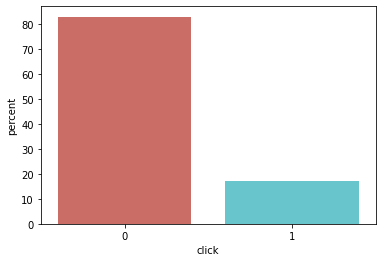

In [11]:
plot = Plotter(train)
plot.count_plot_for_col("click",stat="percent")

Absolutely! Beyond the foundational techniques in data manipulation and analysis using pandas, there are several advanced techniques that can help you delve deeper into data analysis, especially for complex datasets. Here are some additional advanced techniques to consider:

### 1. **Categorical Data Optimization**

Pandas supports categorical data types, which can significantly reduce memory usage and speed up operations on datasets with repetitive text data.

```python
# Convert a column to categorical type
df['A'] = df['A'].astype('category')
```

### 2. **MultiIndex / Hierarchical Indexing**

This feature allows you to work with higher-dimensional data using lower-dimensional data structures like DataFrame and Series.

```python
# Setting a MultiIndex
df.set_index(['A', 'B'], inplace=True)

# Slicing data with a MultiIndex
sliced = df.loc[('foo', 'one')]
```

### 3. **Query Method**

Pandas `query()` method allows for string-expressed conditional filtering, which can make querying more readable and concise.

```python
# Using query to filter data
result = df.query('D > 1 and E < 5')
```

### 4. **Conditional Operations**

Pandas `where()` and `mask()` are useful for conditional selections and replacements, which can be applied across whole DataFrames or Series.

```python
# Conditional operation with where
df['new_column'] = df['D'].where(df['D'] > 2, other=0)
```

### 5. **Eval and Expression Evaluation**

The `eval()` and `query()` functions in pandas use string expressions to efficiently compute operations using DataFrames.

```python
# Efficiently compute expressions
df.eval('G = D + E', inplace=True)
```

### 6. **Data Transformation Using Apply and Map**

These methods are extremely powerful for applying functions to data, either to entire DataFrames, individual columns, or elements.

```python
# Apply a function across a DataFrame
df['D'] = df['D'].apply(lambda x: x ** 2)

# Map can be used for substituting each value in a Series
df['A'] = df['A'].map({'foo': 'good', 'bar': 'bad'})
```

### 7. **Memory Usage Inspection**

Pandas provides tools to help you understand and optimize the memory usage of your DataFrame.

```python
# Get detailed memory usage
df.memory_usage(deep=True)
```

### 8. **Integration with SQL**

Pandas can interact with SQL databases using `read_sql` for reading and `to_sql` for writing data, leveraging SQL capabilities alongside pandas.

```python
import sqlite3

# Connection to a SQLite database
conn = sqlite3.connect('example.db')

# Read data from SQL
pd.read_sql('SELECT * FROM my_table', conn)

# Write data to SQL
df.to_sql('my_table', conn, if_exists='replace')
```

### 9. **Handling Large Datasets**

For very large datasets that don't fit into memory:
- Use libraries like `Dask` which extends pandas data structures to handle large datasets.
- Consider chunking large files using pandas `read_csv(chunksize=)` to process parts of the file.

```python
# Read large data in chunks
chunk_iter = pd.read_csv('large_data.csv', chunksize=1000)
for chunk in chunk_iter:
    process(chunk)
```

### 10. **Advanced Visualization Techniques**

While pandas provides basic plotting capabilities, integrating with libraries like Matplotlib, Seaborn, or Plotly can enable sophisticated visualizations directly from DataFrame objects.

These techniques provide robust tools for handling complex data analysis tasks efficiently, allowing for detailed exploration and manipulation of datasets in Python.

Pandas is a powerful library for data manipulation and analysis in Python, providing extensive capabilities for handling, transforming, and analyzing data. Here are some advanced analyses and their corresponding syntax in pandas, including time series analysis, window functions, and pivot tables.

### 1. **Time Series Analysis**

Pandas has built-in support for time series data, allowing you to perform various operations specific to time-indexed data:

```python
import pandas as pd

# Create a time series data
index = pd.date_range('20200101', periods=100)
data = pd.DataFrame({'value': range(100)}, index=index)

# Resampling (e.g., calculating the mean monthly)
monthly_mean = data.resample('M').mean()

# Shifting (e.g., shift data by 2 days)
shifted_data = data.shift(2)

# Rolling window (e.g., rolling mean with a window of 3 days)
rolling_mean = data.rolling(window=3).mean()
```

### 2. **Window Functions**

Pandas supports window functions that are useful for running calculations over a set of rows related to the current row:

```python
# Load sample data
df = pd.DataFrame({
    'group': ['A', 'A', 'B', 'B', 'B'],
    'value': [10, 20, 10, 30, 20]
})

# Calculate rolling sum within each group
df['rolling_sum'] = df.groupby('group')['value'].rolling(2).sum().reset_index(level=0, drop=True)

# Calculate expanding sum
df['expanding_sum'] = df.groupby('group')['value'].expanding().sum().reset_index(level=0, drop=True)

# Calculate exponential moving average
df['ema'] = df.groupby('group')['value'].transform(lambda x: x.ewm(span=2).mean())
```

### 3. **Pivot Tables**

Pivot tables are a great tool in pandas for summarizing data:

```python
import numpy as np

# Create some example data
df = pd.DataFrame({
    "A": ["foo", "foo", "foo", "bar", "bar", "bar"],
    "B": ["one", "one", "two", "two", "one", "one"],
    "C": ["small", "large", "large", "small", "small", "large"],
    "D": [1, 2, 2, 3, 3, 4],
    "E": [2, 3, 5, 7, 1, 0]
})

# Creating a pivot table
pivot_table = df.pivot_table(values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum)
```

### 4. **Group By with Advanced Aggregations**

Utilizing `groupby` along with multiple aggregations can reveal insights across different segments of data:

```python
# Group by multiple columns and perform different aggregation functions
results = df.groupby(['A', 'B']).agg({
    'D': ['sum', 'mean'],
    'E': ['min', 'max']
})
```

### 5. **Handling Missing Data**

Pandas provides several methods to handle missing data, which is crucial in cleaning up data for analysis:

```python
# Fill missing values with a specified value
df_filled = df.fillna(value=5)

# Forward-fill missing values
df_ffill = df.fillna(method='ffill')

# Drop rows with any missing values
df_dropped = df.dropna()
```

### 6. **Merging and Joining DataFrames**

Combining data from multiple sources is often necessary in data analysis:

```python
# Create another DataFrame
df2 = pd.DataFrame({
    "A": ["foo", "bar", "baz"],
    "F": [5, 10, 15]
})

# Merge df and df2
merged_df = pd.merge(df, df2, on='A', how='inner')
```

Each of these techniques allows you to perform sophisticated data analysis and can be tailored further to meet specific requirements or data types.

In [ ]:
train.reset_index()

# How to pass lambda as external function

Passing a lambda function or any Python function directly through a JSON configuration file or as a text-based argument poses a challenge due to JSON's limitations: it only supports data formats like strings, numbers, arrays, and objects, and doesn't support executable code directly.

However, there are ways to approach this issue that maintain functionality while ensuring security and readability. Here are a few strategies:

### 1. **Use Predefined Functions Mapped to Strings**
Instead of passing functions directly, you can map string identifiers to predefined functions in your Python code. This way, you can specify which function to use in your JSON, and then your code can interpret these strings to execute the corresponding functions.

**JSON Configuration:**
```json
{
  "apply_function": "square_root"
}
```

**Python Code:**
```python
import math

def square_root(x):
    return math.sqrt(x)

def increment(x):
    return x + 1

functions_map = {
    "square_root": square_root,
    "increment": increment
}

config = {
  "apply_function": "square_root"
}

# Using the function from the map
df['column'] = df['column'].apply(functions_map[config['apply_function']])
```

### 2. **Custom Function Definition in Python**
If you need custom functionality, allow users to write their functions in Python and pass the function name as part of the configuration. This requires a bit more trust and control but is flexible.

**JSON Configuration:**
```json
{
  "apply_function": "custom_function"
}
```

**Python Code:**
```python
def custom_function(x):
    # User-defined logic
    return x * 2

config = {
  "apply_function": "custom_function"
}

# Assuming the function is defined in the same scope or is importable
df['column'] = df['column'].apply(locals()[config['apply_function']])
```

### 3. **Using Eval Safely**
For truly dynamic operations where the user might need to define their logic on the fly, you could use `eval()` carefully to execute code defined in a string. However, this approach poses significant security risks (executing arbitrary code) and should be used with extreme caution and restricted environments.

**JSON Configuration:**
```json
{
  "apply_function": "x**2 if x > 0 else -x"
}
```

**Python Code:**
```python
config = {
  "apply_function": "x**2 if x > 0 else -x"
}

# Dangerous! Use only in a secure, controlled way
df['column'] = df['column'].apply(lambda x: eval(config['apply_function']))
```

### 4. **External Python Script or Module**
A more secure and manageable way might be to allow users to specify an external Python script or module where they define their functions. The main application can then import these modules dynamically and use the functions defined therein.

**JSON Configuration:**
```json
{
  "module": "user_defined_module",
  "function": "user_defined_function"
}
```

**Python Code:**
```python
import importlib

config = {
  "module": "user_defined_module",
  "function": "user_defined_function"
}

module = importlib.import_module(config['module'])
function_to_apply = getattr(module, config['function'])

df['column'] = df['column'].apply(function_to_apply)
```

Each of these approaches has its benefits and drawbacks, especially regarding security and flexibility. Carefully consider which method best fits your needs, balancing ease of use with safety and control over the execution environment.

In [12]:
locals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import pandas as pd \nfrom matplotlib import pyplot as plt\nimport numpy as np \nimport seaborn as sns\nfrom matplotlib.ticker import FuncFormatter',
  "pd.options.display.float_format = '{:.4f}'.format",
  'train = pd.read_csv("../data/train_subset.csv")',
  'class Plotter:\n    \n    def __init__(self,df):\n        self.df = df\n        \n    def count_plot(self,\n                  col_name=col_name,\n                  palette="hls",\n                  stat="percent"):\n        sns.countplot(data=self.df,\n                     col_name,\n                     palette=palette,\n                     stat=stat)',
  'class Plotter:\n    \n    def __init__(self,df):\n        self.df = df\n        \n    def count_pl

## Eval Expression 
The `eval()` function in pandas is powerful for evaluating expressions involving DataFrame columns, but it does not directly support group-by operations. The primary use of `eval()` is for element-wise operations, column transformations, and filtering, rather than for grouped or aggregate computations.

### Understanding `eval()` and `groupby`

1. **`eval()`**:
   - Designed for efficient computation of expressions involving DataFrame columns.
   - Can handle simple arithmetic, logical operations, and access to DataFrame columns, but it is not intended for operations that involve grouping data.

2. **`groupby()`**:
   - Used for splitting data into groups based on some criteria, applying a function to each group independently, and combining the results.
   - Supports complex manipulations and aggregations of grouped data which are not possible through `eval()`.

### Alternative: Using `groupby()` with `agg()` or `apply()`

To perform operations that involve grouping, you would typically use the `groupby()` method along with `agg()`, `apply()`, or `transform()`. Here’s how you can use these methods for group-based calculations:

```python
import pandas as pd

# Example DataFrame
df = pd.DataFrame({
    'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Data': [10, 15, 10, 20, 30, 40],
    'Values': [100, 150, 200, 250, 300, 350]
})

# Using groupby with agg to perform aggregation
result = df.groupby('Category').agg({
    'Data': 'sum',  # Summing up the Data column'
```

No, you cannot use the `groupby()` function directly within a `pandas.eval()` expression. The `eval()` function is designed for element-wise operations and is limited to operations that can be expressed as array expressions. It does not support operations that inherently involve a change in the dimensions or structure of the DataFrame, such as grouping.

### What `eval()` Can Do
`eval()` is most useful for operations such as:
- Arithmetic operations (`+, -, *, /`)
- Comparison operations (`>, <, >=, <=, ==, !=`)
- Logical operations (`and, or, not`)
- Accessing DataFrame columns for calculations

### Correct Way to Use `groupby`
To perform operations that involve grouping, you should use the `groupby()` method on the DataFrame itself. After grouping, you can apply aggregation functions, transformations, or filter operations using `agg()`, `apply()`, or `filter()` respectively.

Here's a quick example of how to correctly use `groupby()`:

```python
import pandas as pd

# Example DataFrame
df = pd.DataFrame({
    'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Data': [10, 15, 10, 20, 30, 40],
    'Values': [100, 150, 200, 250, 300, 350]
})

# Using groupby to aggregate data
aggregated_data = df.groupby('Category').agg({
    'Data': 'sum',  # Summing up the 'Data' for each category
    'Values': 'mean'  # Calculating the mean of 'Values' for each category
})

print(aggregated_data)
```

### If You Need Dynamic Expression Evaluation with Grouping
If your use case involves dynamically constructing expressions for grouped data (something similar to what `eval()` facilitates but with `groupby`), you might need to manually parse these expressions and apply them using `apply()` or `agg()` with `groupby()`. This is not straightforward and lacks the simplicity and security guarantees of `eval()`.

For example, to dynamically apply a function based on user input in a safe way without `eval()`, you can use a dictionary to map user inputs to secure function calls or use `pd.eval()` with safe arguments within an `apply()` call after a `groupby()`:

```python
# Example of dynamically choosing an operation
operations = {
    'sum_data': lambda x: x['Data'].sum(),
    'mean_values': lambda x: x['Values'].mean()
}

# User input specifies operation
user_input = 'sum_data'

# Apply user-selected operation in a groupby context
result = df.groupby('Category').apply(operations[user_input])
print(result)
```

This approach keeps the flexibility of applying dynamic operations while avoiding the direct evaluation of potentially unsafe strings as code.
    


In [ ]:
class DFProcessor:
    
    def __init__(self,df):
        self.df = df
        
    def __rename_cols(self,col_dic):
        for key,val in col_dic:
            self.df.rename(columns=col_dic)
    
    def __reset_index(self,inplace=True):
        self.df.reset_index(inplace=inplace)
    
    def data_transformation_on_each_element_in_col(self,func_name,new_col_name=new_col_name,col_name=col_name):
        self.df[new_col_name] = self.df[col_name].apply(locals()[func_name])
        
    def substituting_each_element_in_col(self,new_col_name,col_name,dic):
        self.df[new_col_name] = self.df[col_name].map(dic)
    
    def filtering_cols(self,eval_expression,inplace=False):
        return self.df.eval(eval_expression,inplace=inplace)
    
    